# 1. Libraries

In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Load Test Data

In [222]:
test_df = pd.read_csv('KDDTest+.txt', header=None)

# 3. Data Pre-Processing

## 3.1. Adjust column

In [223]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count','srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

test_df.columns = columns

## 3.2. Classify Attack Column as Normal & attack

In [224]:
attack_n = []
for i in test_df.attack :
  if i == 'normal':
    attack_n.append(0)
  else:
    attack_n.append(1)
test_df['attack'] = attack_n 

## 3.3. Preprocess categorical features

In [225]:
protocol_type_le = preprocessing.LabelEncoder()
service_le = preprocessing.LabelEncoder()
flag_le = preprocessing.LabelEncoder()

## 3.4. Convert Categorical Data into Numerical Data

In [226]:
test_df['protocol_type'] = protocol_type_le.fit_transform(test_df['protocol_type'])
test_df['service'] = service_le.fit_transform(test_df['service'])
test_df['flag'] = flag_le.fit_transform(test_df['flag'])

## 3.5. Define features and labels

In [227]:
X_test = test_df.drop(columns=['attack'])
Y_test = test_df['attack']

# 4. Evaluating Mode

## 4.1. Load the Scaler and Standardize Features

In [228]:
scaler = joblib.load('scaler.pkl')
X_test = scaler.transform(x_test)

## 4.2. Load the Gradient Boosting Model

In [229]:
model = joblib.load('gbm_model.pkl')

## 4.3. Make Predictions

In [230]:
Y_pred = model.predict(X_test)

## 4.4. Calculate Accuracy

In [231]:
label_mapping = {'normal': 0, 'attack': 1}
Y_pred_mapped = [label_mapping[label] for label in Y_pred]

In [232]:
accuracy = accuracy_score(y_test, Y_pred_mapped)
print('Testing accuracy:', accuracy)

Testing accuracy: 0.8529542228530873


In [233]:
report = classification_report(Y_test, Y_pred_mapped)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.97      0.85      9711
           1       0.97      0.77      0.86     12833

    accuracy                           0.85     22544
   macro avg       0.86      0.87      0.85     22544
weighted avg       0.88      0.85      0.85     22544



## 4.5. Plot Confusion Matrix

/tmp/ipykernel_11714/3667735665.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


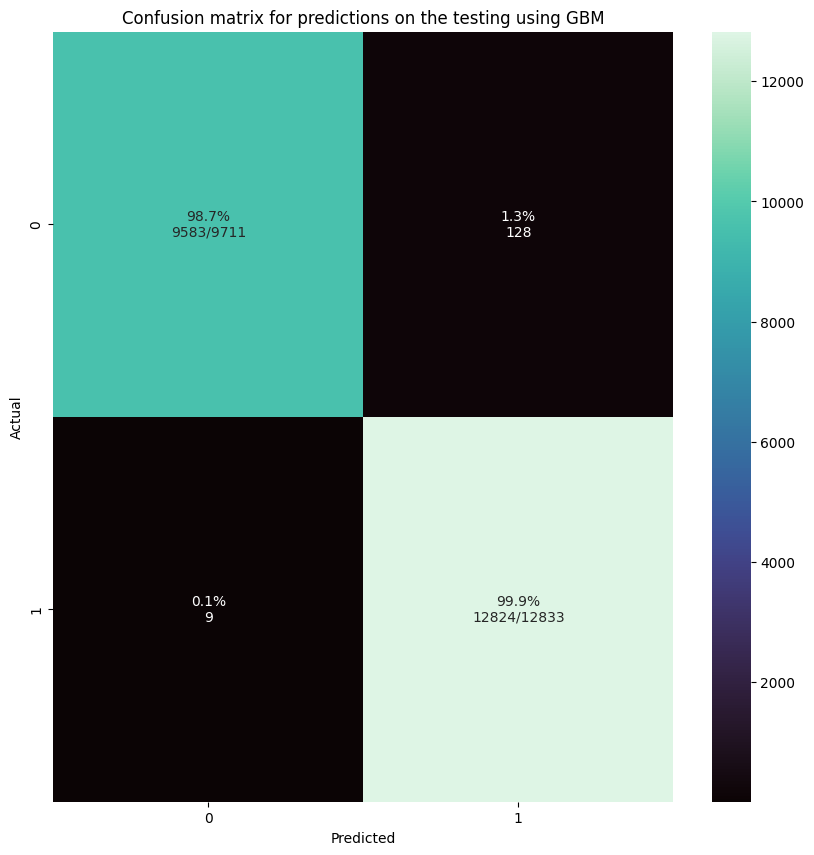

In [234]:
plot_cm(y_test, y_pred_mapped, 'Confusion matrix for predictions on the testing using GBM')